<br>

<br>
<br>


# Function Transformer: 

<br>
<br>

<br>

In [1]:

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("dataset/train.csv",usecols=["Age","Fare","Survived"])
df.sample(2)

,Survived,Age,Fare
629,0,NaN,7.7333
332,0,38.0,153.4625


In [3]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [4]:
df["Age"].fillna(df["Age"].mean(),inplace=True)

/tmp/ipykernel_7270/2595122914.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].mean(),inplace=True)


In [5]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [6]:
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,1:],df["Survived"],test_size=0.2,random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 2)
(179, 2)
(712,)
(179,)


In [7]:
X_train.sample(2)

,Age,Fare
523,44.000000,57.9792
101,29.699118,7.8958


0.3599658846236587


Text(0.5, 1.0, 'QQ Plot of Age')

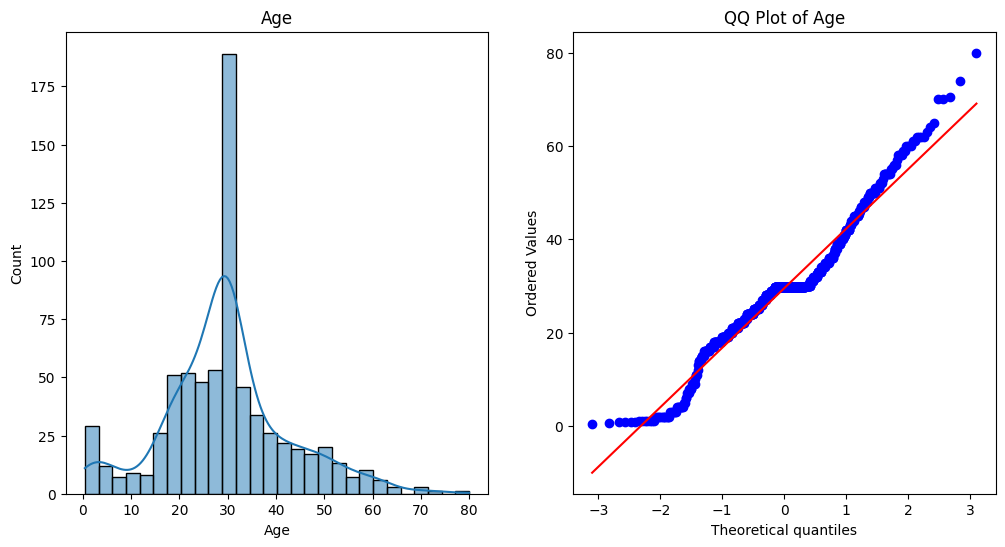

In [8]:

# Create subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.histplot(data=X_train, x="Age", kde=True, ax=ax[0])
ax[0].set_title("Age")

print(X_train["Age"].skew())


stats.probplot(X_train["Age"], plot=ax[1])
ax[1].set_title("QQ Plot of Age")



Text(0.5, 1.0, 'QQ of Fare')

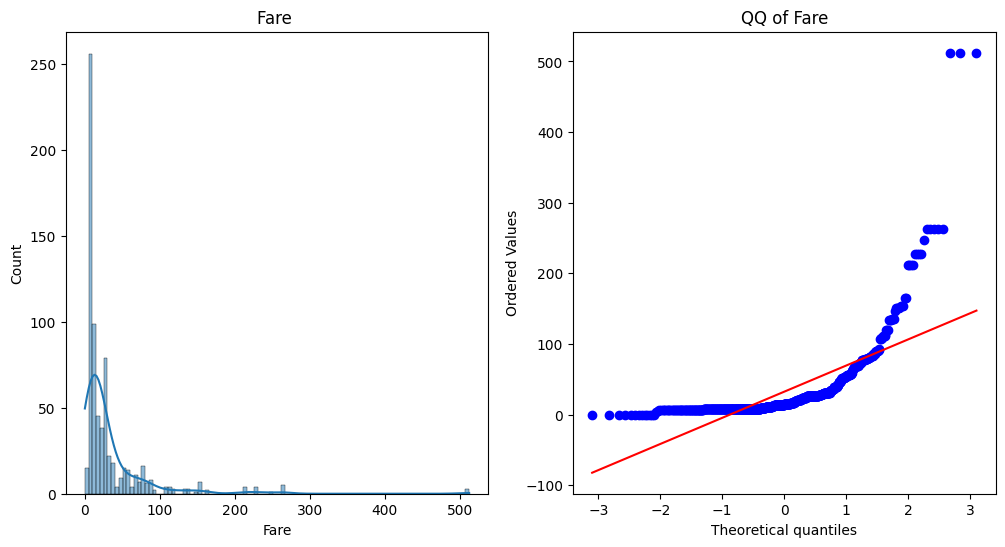

In [9]:

# Create subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.histplot(data=X_train,x="Fare",kde=True,ax=ax[0])
ax[0].set_title("Fare ")

stats.probplot(x=X_train["Fare"],plot=ax[1])
ax[1].set_title("QQ of Fare")


In [10]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_prd_clf1 = clf1.predict(X_test)
y_prd_clf2 = clf2.predict(X_test)

print(f"accuracy_score: LogisticRegression: {accuracy_score(y_test,y_prd_clf1)}")
print(f"accuracy_score: DecisionTreeClassifier: {accuracy_score(y_test,y_prd_clf2)}")

accuracy_score: LogisticRegression: 0.6480446927374302
accuracy_score: DecisionTreeClassifier: 0.659217877094972


<br>

# Apply Function transformer:

<br>

In [11]:
trf = FunctionTransformer(func=np.log1p)  # log1p always add 1 with it's value so it will never be zero

In [12]:
X_train_transform = trf.fit_transform(X_train)
X_test_transform = trf.fit_transform(X_test)

In [13]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf1.fit(X_train_transform,y_train)
clf2.fit(X_train_transform,y_train)

y_prd_clf1 = clf1.predict(X_test_transform)
y_prd_clf2 = clf2.predict(X_test_transform)

print(f"accuracy_score: LogisticRegression: {accuracy_score(y_test,y_prd_clf1)}")
print(f"accuracy_score: DecisionTreeClassifier: {accuracy_score(y_test,y_prd_clf2)}")


accuracy_score: LogisticRegression: 0.6815642458100558
accuracy_score: DecisionTreeClassifier: 0.6759776536312849



## Accuracy,incread , we need also cross validate to ensure how ?? 


In [14]:
cross_val_score(clf1,X_train_transform,y_train,cv=10).mean()

0.6783646322378717

<br>
<br>

## See the graph before and after log transformation:

<br>
<br>


Text(0.5, 1.0, 'After Log Transformation ')

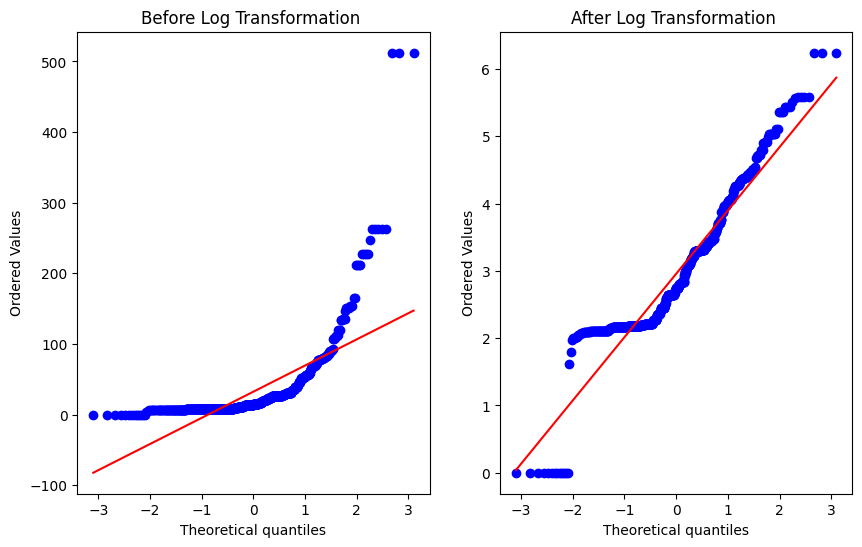

In [15]:
fig,ax = plt.subplots(1,2,figsize=(10,6))

stats.probplot(X_train["Fare"],plot=ax[0])
ax[0].set_title("Before Log Transformation ")

stats.probplot(X_train_transform["Fare"],plot=ax[1])
ax[1].set_title("After Log Transformation ")


Text(0.5, 1.0, 'After Log Transformation ')

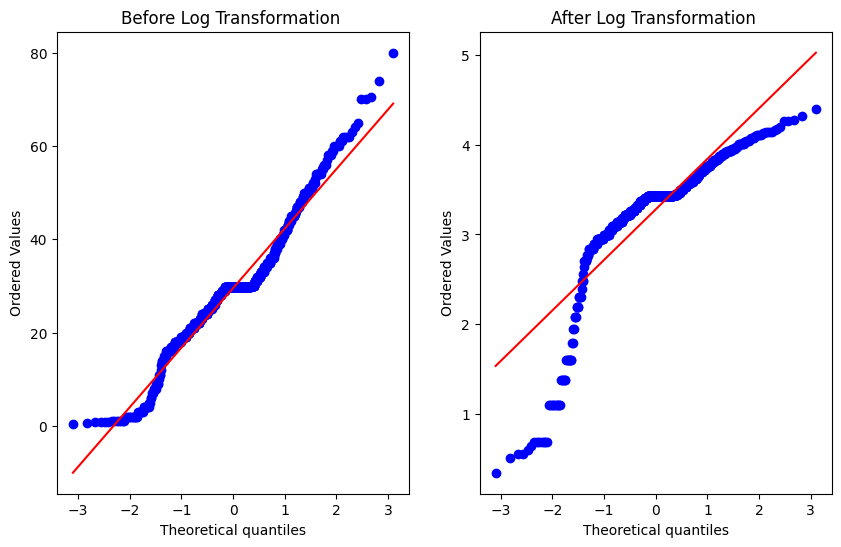

In [16]:
fig,ax = plt.subplots(1,2,figsize=(10,6))

stats.probplot(X_train["Age"],plot=ax[0])
ax[0].set_title("Before Log Transformation ")

stats.probplot(X_train_transform["Age"],plot=ax[1])
ax[1].set_title("After Log Transformation ")


<br>

`In fare column transformaion is good, but for age it's not good .(From the qq plot.)`

<br>

<br>

# we apply the function transformer only for fare:  

<br>

In [17]:
trans = ColumnTransformer(
    transformers=[
        ("trans1",FunctionTransformer(func=np.log1p),['Fare'])
    ],
    remainder="passthrough"
)

In [18]:
X_train_transform2 = trans.fit_transform(X_train)
X_test_transform2 = trans.fit_transform(X_test)

In [19]:

clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf1.fit(X_train_transform2,y_train)
clf2.fit(X_train_transform2,y_train)

y_prd_clf1 = clf1.predict(X_test_transform2)
y_prd_clf2 = clf2.predict(X_test_transform2)

print(f"accuracy_score: LogisticRegression: {accuracy_score(y_test,y_prd_clf1)}") # not good result:
print(f"accuracy_score: DecisionTreeClassifier: {accuracy_score(y_test,y_prd_clf2)}")



accuracy_score: LogisticRegression: 0.6703910614525139
accuracy_score: DecisionTreeClassifier: 0.6983240223463687


In [20]:
cross_val_score(clf1,X_train_transform2,y_train,cv=10).mean()

0.6572378716744913


<br>

`Hence, Data distribution is not affected our DecisionTreeClassifier. Because, DecisionTreeClassifier don't depend of data distribution. `

<br>


<br>
<br>
<br>

# Others reminaning Transformations: 

<br>
<br>
<br>

In [21]:

def applyTransformation(transformation):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    trf = ColumnTransformer(
        transformers=[
            ('log',FunctionTransformer(func=(transformation)),["Fare"])
        ],
        remainder="passthrough"
    )
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print(f"Accuracy : {cross_val_score(clf,X_trans,y,scoring="accuracy",cv=10).mean()}")
    
    fg, ax = plt.subplots(nrows=1,ncols=2,figsize=(10,6))
    
    stats.probplot(X["Fare"],plot=ax[0])
    ax[0].set_title("Before appling function transformer: ")
    
    
    stats.probplot(X_trans[:,0],plot=ax[1])
    ax[1].set_title("After appling function transformer: ")
    
    plt.show()
    
    

Accuracy : 0.6589013732833957


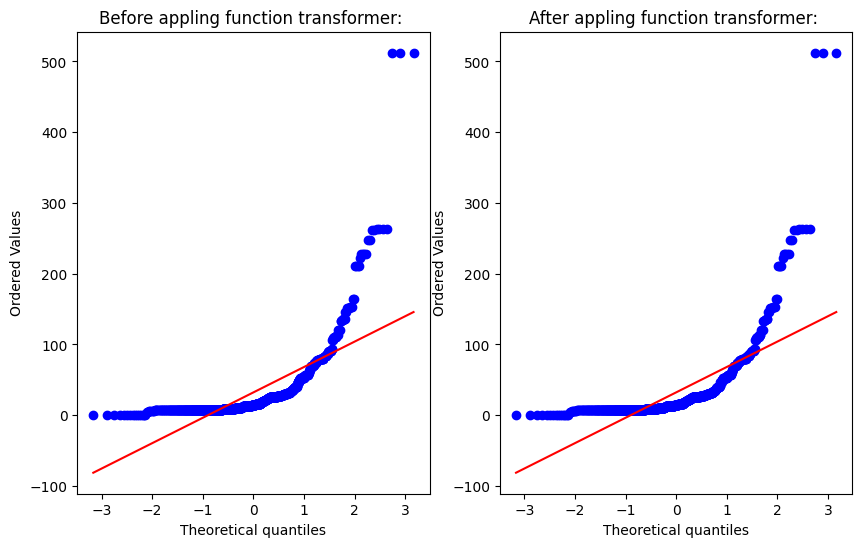

In [22]:
applyTransformation(lambda x: x)

Accuracy : 0.6431335830212235


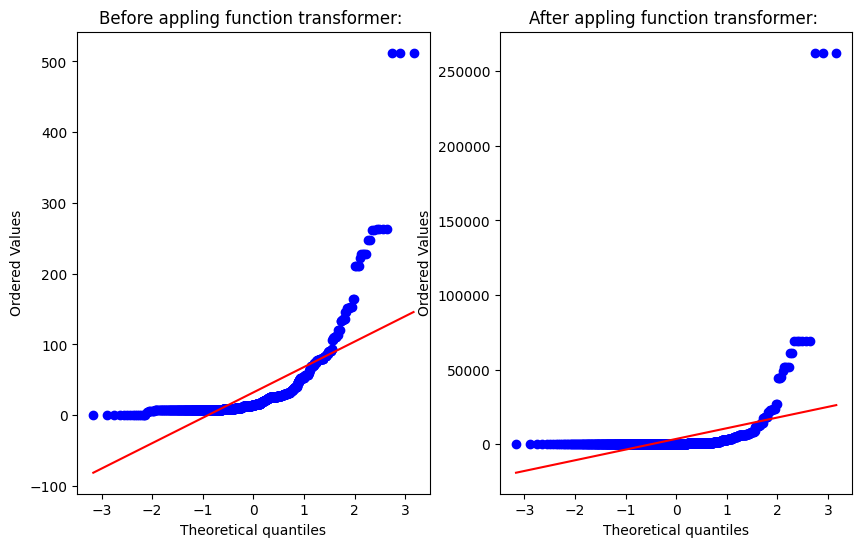

In [23]:
applyTransformation(lambda x: x**2)

Accuracy : 0.6262796504369538


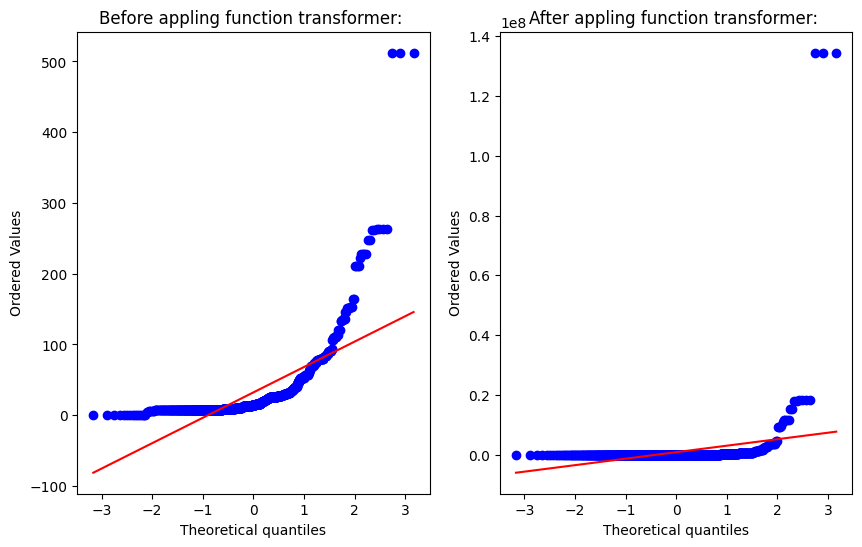

In [24]:
applyTransformation(lambda x: x**3)

Accuracy : 0.6611485642946316


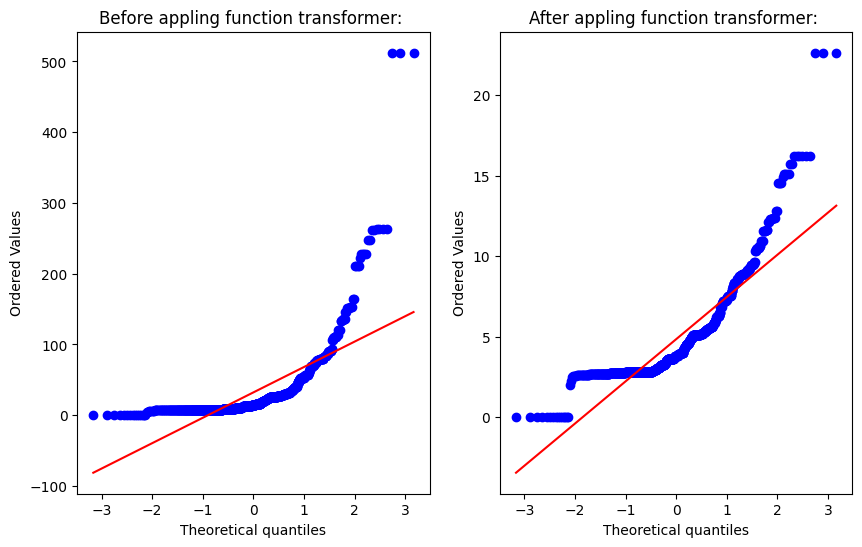

In [25]:
applyTransformation(lambda x: x**(1/2))

Accuracy : 0.61729088639201


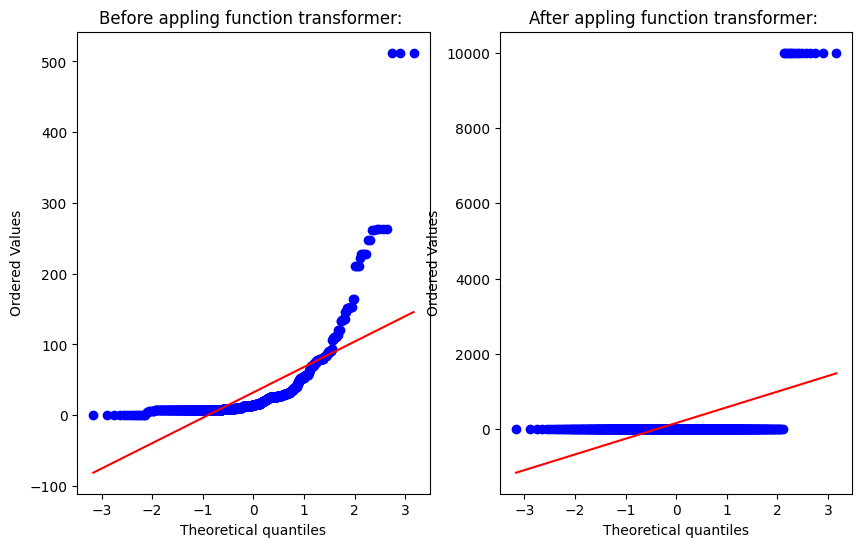

In [26]:
applyTransformation(lambda x: 1/(x+0.0001))

Accuracy : 0.6195131086142323


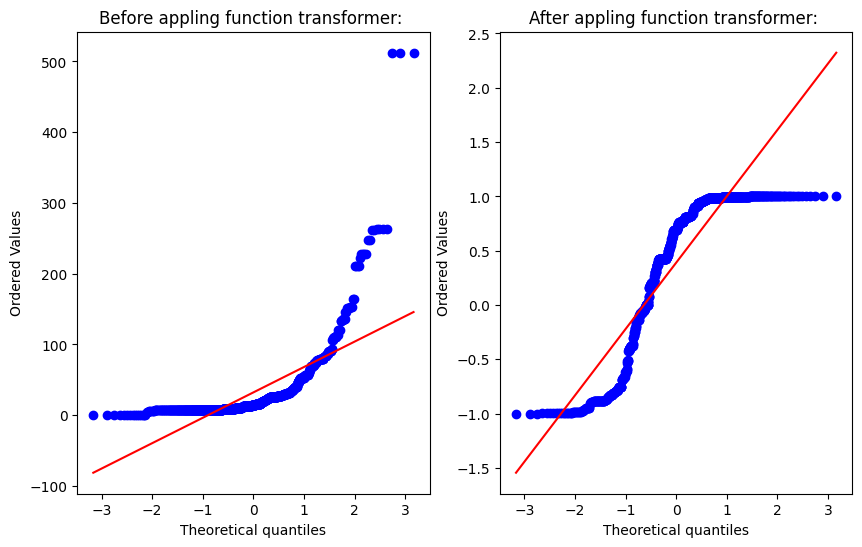

In [27]:
applyTransformation(np.sin)